In [39]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import scipy
from numpy import linalg as LA

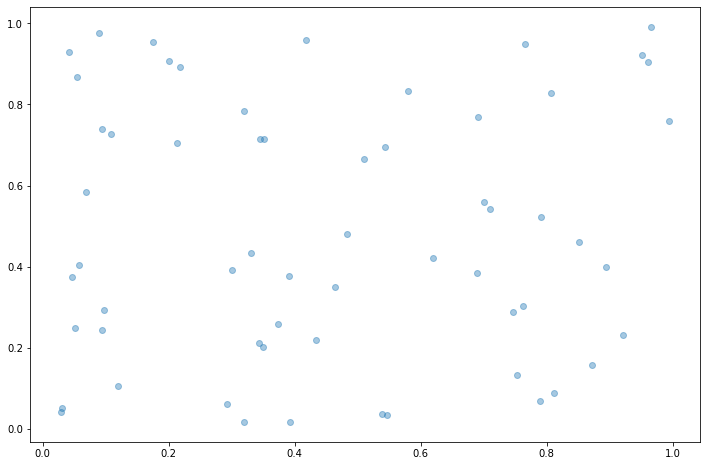

In [40]:
import numpy as np
X = np.random.rand(60,20)

#Displaying the output
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], alpha = .4)

In [3]:
mean_ = np.apply_along_axis(lambda x:np.mean(x), 0, X) 
X_ = np.apply_along_axis(lambda x,m : x-m, 1, X, mean_)

In [4]:
from scipy.sparse.linalg import svds, eigs
u, s, vt = svds(X_)

### power iteration for calculating dominant eigenvector/ eigenvalues


In [41]:
xtest = np.random.rand(20,20)

In [42]:
w, v = LA.eig(xtest)
v[0].shape, v.shape, w.shape

((20,), (20, 20), (20,))

In [43]:
def power_iteration(A, iter_):
    tol = 1e-10
    
    eigvec = np.random.random(A.shape[0])
    #initial eigenvalue 
    eigval_old = np.dot(eigvec.T, A.dot(eigvec))/np.dot(eigvec.T,eigvec)        
    
    while iter_:
        eigvec = A.dot(eigvec)
        norm = np.linalg.norm(eigvec)
        eigvec /= norm
        
        # updated eigenvalue
        eigval_new = np.dot(eigvec.T, A.dot(eigvec))/np.dot(eigvec.T,eigvec)  
        diff = eigval_new - eigval_old
        
        if abs(diff) < tol:
            return eigval_new, eigvec
        
        # update the current eigvalue
        eigval_old = eigval_new
        iter_ -= 1
        
    return eigval_new, eigvec

In [44]:
eigval_new, eigvec = power_iteration(xtest, 2000)

In [46]:
eigvec

array([0.2089263 , 0.20735426, 0.26908399, 0.19587807, 0.22357228,
       0.2432718 , 0.20748646, 0.24360553, 0.20446555, 0.25371446,
       0.19143336, 0.22837178, 0.21166138, 0.24188341, 0.20869562,
       0.19630752, 0.2311158 , 0.25779673, 0.23275881, 0.19129303])

In [47]:
# confirmation
eigenvalues, eigenvectors = LA.eig(xtest)

In [48]:
eigenvectors[:, 0]

array([0.2089263 +0.j, 0.20735426+0.j, 0.26908399+0.j, 0.19587807+0.j,
       0.22357228+0.j, 0.2432718 +0.j, 0.20748646+0.j, 0.24360553+0.j,
       0.20446555+0.j, 0.25371446+0.j, 0.19143336+0.j, 0.22837178+0.j,
       0.21166138+0.j, 0.24188341+0.j, 0.20869562+0.j, 0.19630752+0.j,
       0.2311158 +0.j, 0.25779673+0.j, 0.23275881+0.j, 0.19129303+0.j])

### power-iteration for calculating svd

In [33]:
def power_svd(mat, iters):
    # transform mat into square matrix
    AtA = mat.T.dot(mat)
    
    # random vector aligned with the mat dimension
    v = np.random.random(size= mat.shape[1])

    # normal power iteration for calculating dominant eigenvector
    for i in range(iters):
        v = AtA.dot(v)
        v /= np.linalg.norm(v)
    
    # calculating sigma from np
    # largest sing. value
    Av = mat.dot(v)
    sigma_ = np.linalg.norm(Av, ord =2)
    
    # calculate lambda of AtA from Rayleigh Quotient
    lambda_ = np.dot(v.T, AtA.dot(v))/np.dot(v.T,v)
    sigma = math.sqrt(lambda_)
    
    diff = abs(sigma - sigma_)
    u = Av / sigma
    
    return np.reshape(u, (mat.shape[0], 1)), sigma, np.reshape(v, (mat.shape[1], 1)), diff

In [34]:
rank = np.linalg.matrix_rank(X_)
U, S, V = np.zeros((X_.shape[0], 1)), [], np.zeros((X_.shape[1], 1))
diff = []

In [50]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_)

PCA()

In [51]:
# for confirmation
print(pca.singular_values_)

[3.30323445 3.01487793 2.96637011 2.69200499 2.6547323  2.54149223
 2.43995859 2.29665621 2.21078819 2.12014664 2.02033803 1.93776643
 1.88886032 1.78441625 1.70524671 1.62640501 1.42646908 1.36547121
 1.22482122 0.70586806]


In [52]:
## calculate the svd of A
A = X_

for i in range(rank):
    u, sigma, v, diff_ = power_svd(A, 100)
    U = np.hstack((U, u))
    S.append(sigma)
    V = np.hstack((V, v))
    print(i, sigma)
    diff.append(diff_)
    
    # update the residual part
    A = A - u.dot(sigma).dot(v.T)

0 3.303234448631947
1 3.014837240114433
2 2.9664114653795393
3 2.691983426634165
4 2.654754156513444
5 2.541491647125446
6 2.4399592012141937
7 2.29665620756233
8 2.21078819280394
9 2.1201466437904037
10 2.02033802704434
11 1.937750075044628
12 1.888877098533897
13 1.7844162350877906
14 1.7052467258602344
15 1.626405011685111
16 1.4264690711585661
17 1.3654712181632158
18 1.2248212184281355
19 0.705868063726358


In [53]:
diff

[4.440892098500626e-16,
 4.440892098500626e-16,
 0.0,
 8.881784197001252e-16,
 0.0,
 0.0,
 4.440892098500626e-16,
 0.0,
 4.440892098500626e-16,
 4.440892098500626e-16,
 0.0,
 4.440892098500626e-16,
 2.220446049250313e-16,
 4.440892098500626e-16,
 0.0,
 2.220446049250313e-16,
 0.0,
 2.220446049250313e-16,
 0.0,
 1.1102230246251565e-16,
 0.0,
 0.0,
 4.440892098500626e-16,
 4.440892098500626e-16,
 4.440892098500626e-16,
 4.440892098500626e-16,
 4.440892098500626e-16,
 4.440892098500626e-16,
 0.0,
 4.440892098500626e-16,
 0.0,
 2.220446049250313e-16,
 4.440892098500626e-16,
 2.220446049250313e-16,
 2.220446049250313e-16,
 2.220446049250313e-16,
 0.0,
 0.0,
 0.0,
 1.1102230246251565e-16]